# Imports

In [1]:
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# KNN

## Distance Function

In [2]:
def eucl_dist(A, B):
    '''
    Calculate euclidean distance between two points
    '''
    squares = [(a - b)**2 for a, b in zip(A, B)]
    return(sum(squares)**0.5)

## Data

### Initial Parameters

In [3]:
# number of groups
num_grps = 3
# minimum number of points per group
min_pts = 15
# maximum number of points per group
max_pts = 50

### Generate Data

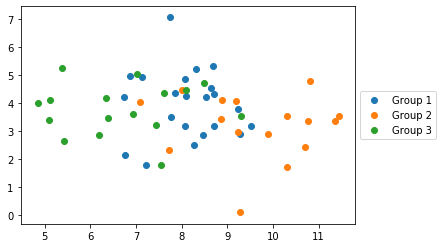

In [4]:
data = []
fig, ax = plt.subplots()
# generate randomized data set for each group
for i in range(num_grps):
    # random size of group based on limits
    size = np.random.randint(min_pts, max_pts+1)
    # centroid of group
    cntr = np.random.randint(1, 11, size=2)
    # assign x values (random centroid with noise)
    x = cntr[0] + np.random.normal(0, 1.15, size=size)
    # assign y values (random centroid with noise)
    y = cntr[1] + np.random.normal(0, 1.15, size=size)
    # assign group to points
    grp = ['Group ' + str(i+1)] * size
    # combine x, y coords and group and add to data list
    data += [i for i in zip(x, y, grp)]
    # plot data
    ax.scatter(x, y, label=grp[0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Test Data

In [5]:
# select test set from data (20%)
test_set = random.sample(data, int(len(data) * 0.2))
# define variable with only test coordinates
test_pts = [(pt[0], pt[1]) for pt in test_set]
# define variable with test groups
test_grp = [pt[2] for pt in test_set]

### Train Data

In [6]:
# designate training data
train_set = [i for i in data if i not in test_set]
# define variable with only train coordinates
train_pts = [(pt[0], pt[1]) for pt in train_set]
# define variable containing train groups
train_grp = [pt[2] for pt in train_set]

## Model

### 1. Training Points

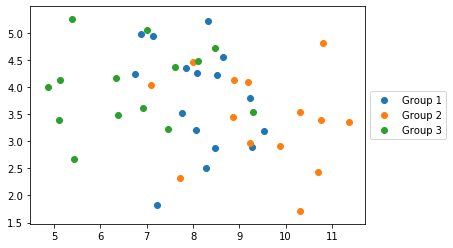

In [7]:
# plot training set
fig, ax = plt.subplots()
# iterate through all groups in training set
for i in range(num_grps):
    # prepare label for training group
    group = sorted(list(set(train_grp)))[i]
    # all x values for training group
    x_val = [pt[0] for pt in train_set if pt[2] == group]
    # all y values for training group
    y_val = [pt[1] for pt in train_set if pt[2] == group]
    # plot all training points by group
    ax.scatter(x_val, y_val, label=group)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### 2. Add Test Points

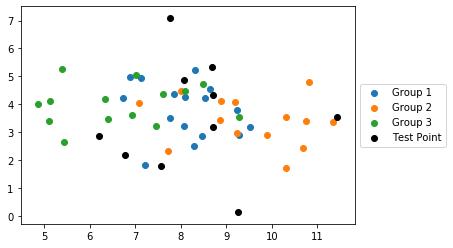

In [8]:
# plot test set with training set
fig, ax = plt.subplots()
for i in range(num_grps):
    group = sorted(list(set(train_grp)))[i]
    x_val = [pt[0] for pt in train_set if pt[2] == group]
    y_val = [pt[1] for pt in train_set if pt[2] == group]
    ax.scatter(x_val, y_val, label=group)
# all x values for test points
test_x = [pt[0] for pt in test_pts]
# all y values for test points
test_y = [pt[1] for pt in test_pts]
# add test points to plot
ax.scatter(test_x, test_y, label='Test Point', c='black')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### 3. Classify Test Set

In [9]:
# number of nearest neighbors for predictions
k_num = 3

In [10]:
test_preds = []
# predict group for each test point
for point in test_pts:
    # calculate distance from all training points to test point
    dists = list(map(eucl_dist, train_pts, [point]*len(train_pts)))
    # return the indices for test point's nearest neighbors
    min_dists = np.argsort(dists)[:k_num]
    # return the nearest neighbors
    test_pt_nns = [train_set[i] for i in np.argsort(dists)[:k_num]]
    # find mode of nearest neighbor groups for test point prediction
    grp_pred = Counter([point[2] for point in test_pt_nns]).most_common(1)[0][0]
    test_preds.append((point[0], point[1], grp_pred))
test_preds

[(8.682792205428035, 5.346661902828985, 'Group 1'),
 (7.553949955730645, 1.8079373052921324, 'Group 1'),
 (9.26956933346829, 0.13258629346256434, 'Group 1'),
 (8.714201065010856, 3.2039839509368773, 'Group 2'),
 (7.753320226049726, 7.097704094162769, 'Group 1'),
 (8.074356324076076, 4.857414079042873, 'Group 3'),
 (6.193562796611676, 2.8783138966751878, 'Group 3'),
 (6.768412915271229, 2.1693839503715755, 'Group 1'),
 (8.698364191464355, 4.324114037096842, 'Group 1'),
 (11.441550294366728, 3.5430368734124777, 'Group 2')]

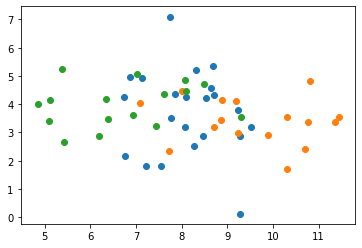

In [11]:
# plot predicted test set with train set
fig, ax = plt.subplots()
for i in range(num_grps):
    group = sorted(list(set(train_grp)))[i]
    x_val = [pt[0] for pt in train_set if pt[2] == group]
    y_val = [pt[1] for pt in train_set if pt[2] == group]
    x_val.extend([pt[0] for pt in test_preds if pt[2] == group])
    y_val.extend([pt[1] for pt in test_preds if pt[2] == group])
    ax.scatter(x_val, y_val, label=group)

## Evaluate Model

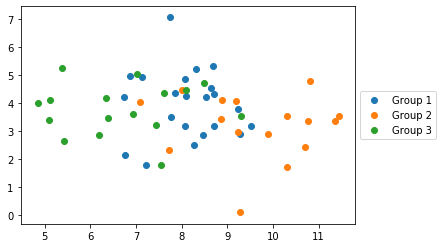

In [12]:
# plot actual test and train sets
fig, ax = plt.subplots()
for i in range(num_grps):
    group = sorted(list(set([pt[2] for pt in data])))[i]
    x_val = [pt[0] for pt in data if pt[2] == group]
    y_val = [pt[1] for pt in data if pt[2] == group]
    ax.scatter(x_val, y_val, label=group)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [13]:
# calculate model prediction accuracy
sum(list(map(lambda x, y: x == y, [item[2] for item in test_preds], test_grp))) / len(test_set)

0.6

## Determine Optimal k

In [14]:
# maximum number of nearest neighbors
k_num_max = 10

In [15]:
acc = []
for n in range(1, k_num_max+1):
    
    test_preds = []
    # predict group for each test point
    for point in test_pts:
        # calculate distance from all training points to test point
        dists = list(map(eucl_dist, train_pts, [point]*len(train_pts)))
        # return the indices for test point's nearest neighbors
        min_dists = np.argsort(dists)[:n]
        # return the nearest neighbors
        test_pt_nns = [train_set[i] for i in np.argsort(dists)[:n]]
        # find mode of nearest neighbor groups for test point prediction
        grp_pred = Counter([point[2] for point in test_pt_nns]).most_common(1)[0][0]
        test_preds.append((point[0], point[1], grp_pred))
    acc.append(sum(list(map(lambda x, y: x == y, [item[2] for item in test_preds], test_grp))) / len(test_set))

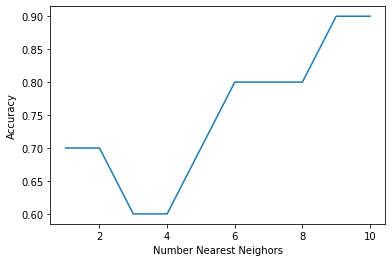

In [16]:
# select k value with highest accuracy
plt.plot(range(1, k_num_max+1), acc)
plt.xlabel('Number Nearest Neighors')
plt.ylabel('Accuracy');

# Sklearn KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# create instance of KNN model with input for number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
# fit model to training data
knn.fit(train_pts, train_grp)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
# output model predictions for test data
knn.predict(test_pts)

array(['Group 1', 'Group 1', 'Group 1', 'Group 2', 'Group 1', 'Group 3',
       'Group 3', 'Group 1', 'Group 1', 'Group 2'], dtype='<U7')

In [21]:
# output model labels
knn.classes_

array(['Group 1', 'Group 2', 'Group 3'], dtype='<U7')

In [22]:
# output model prediction probabilities for each label
knn.predict_proba(test_pts)

array([[0.66666667, 0.        , 0.33333333],
       [0.66666667, 0.33333333, 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [0.33333333, 0.66666667, 0.        ],
       [0.66666667, 0.        , 0.33333333],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 1.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.33333333, 0.        ],
       [0.        , 1.        , 0.        ]])

## Evaluate Model

In [23]:
from sklearn import metrics

In [24]:
# return accuracy score of model predictions
metrics.accuracy_score(test_grp, knn.predict(test_pts))

0.6